In [23]:
import pandas as pd
# plot all the attributes in a histogramm
%matplotlib inline
 # only in a Jupyter notebook
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [24]:
csv_path = "./Automobile-Dataset/imports-85.data"
headers=[ "symboling", "normalized_losses", "make", "fuel-type", "aspirations", "Nr_of_doors", "body-styles", "drive-wheels", "engine-location", "wheel-base", "length", "width", "height", "curb-weight","engine-type", "num-of-cylinders", "engine-size", "fuel-system", "bore", "stroke", "compression-ratio", "horsepower", "peak-rpm", "city-mpg", "highway-mpg", "price"]
auto_data = pd.read_csv(csv_path,  header=None, names=headers,delimiter=",")
auto_data.head() # checkout first five rows to get an idea
auto_data

symboling normalized_losses         make fuel-type aspirations  \
0            3                 ?  alfa-romero       gas         std   
1            3                 ?  alfa-romero       gas         std   
2            1                 ?  alfa-romero       gas         std   
3            2               164         audi       gas         std   
4            2               164         audi       gas         std   
..         ...               ...          ...       ...         ...   
200         -1                95        volvo       gas         std   
201         -1                95        volvo       gas       turbo   
202         -1                95        volvo       gas         std   
203         -1                95        volvo    diesel       turbo   
204         -1                95        volvo       gas       turbo   

    Nr_of_doors  body-styles drive-wheels engine-location  wheel-base  ...  \
0           two  convertible          rwd           front       88.60  ...   
1           two  convertible          rwd           front       88.60  ...   
2           two    hatchback          rwd           front       94.50  ...   
3          four        sedan          fwd           front       99.80  ...   
4          four        sedan          4wd           front       99.40  ...   
..          ...          ...          ...             ...         ...  ...   
200        four        sedan          rwd           front      109.10  ...   
201        four        sedan          rwd           front      109.10  ...   
202        four        sedan          rwd           front      109.10  ...   
203        four        sedan          rwd           front      109.10  ...   
204        four        sedan          rwd           front      109.10  ...   

     engine-size  fuel-system  bore  stroke compression-ratio horsepower  \
0            130         mpfi  3.47    2.68              9.00        111   
1            130         mpfi  3.47    2.68              9.00        111   
2            152         mpfi  2.68    3.47              9.00        154   
3            109         mpfi  3.19    3.40             10.00        102   
4            136         mpfi  3.19    3.40              8.00        115   
..           ...          ...   ...     ...               ...        ...   
200          141         mpfi  3.78    3.15              9.50        114   
201          141         mpfi  3.78    3.15              8.70        160   
202          173         mpfi  3.58    2.87              8.80        134   
203          145          idi  3.01    3.40             23.00        106   
204          141         mpfi  3.78    3.15              9.50        114   

     peak-rpm city-mpg highway-mpg  price  
0        5000       21          27  13495  
1        5000       21          27  16500  
2        5000       19          26  16500  
3        5500       24          30  13950  
4        5500       18          22  17450  
..        ...      ...         ...    ...  
200      5400       23          28  16845  
201      5300       19          25  19045  
202      5500       18          23  21485  
203      4800       26          27  22470  
204      5400       19          25  22625  

[205 rows x 26 columns]

In [25]:
auto_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspirations        205 non-null    object 
 5   Nr_of_doors        205 non-null    object 
 6   body-styles        205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [26]:
# calculate missing values
auto_data = auto_data.replace('?',np.NAN) 
auto_data.isnull().sum()

symboling             0
normalized_losses    41
make                  0
fuel-type             0
aspirations           0
Nr_of_doors           2
body-styles           0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

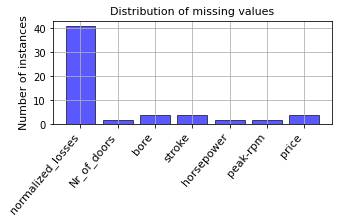

In [27]:
missing_vals = np.array(auto_data.isnull().sum())
header_arr = np.array(headers)
mask = missing_vals>0
fig = plt.figure(figsize=(5,3))
plt.bar(x=header_arr[mask], height=missing_vals[mask], color='blue', edgecolor='k', alpha=0.65)
plt.xticks(rotation=50,fontsize=11, ha="right")
plt.title("Distribution of missing values",fontsize=11)
plt.ylabel("Number of instances",fontsize=11)
fig.subplots_adjust(bottom=0.4) 
plt.grid()
plt.savefig("car_miss.pdf")

replace missing values by their mean

In [28]:
n=0 # normalized_losses
mask1 = np.array(auto_data[header_arr[mask][n]].isnull())!=1
mean1 = np.array(auto_data[header_arr[mask][n]][mask1],dtype="int").mean()
auto_data[header_arr[mask][n]]=auto_data[header_arr[mask][n]].replace(np.NAN,mean1).astype(int)

n=1 # doors
mask1 = np.array(auto_data[header_arr[mask][n]].isnull())!=1
auto_data[header_arr[mask][n]]=auto_data[header_arr[mask][n]].replace(np.NAN,"two")

n=2 # bore
mask1 = np.array(auto_data[header_arr[mask][n]].isnull())!=1
mean1 = np.array(auto_data[header_arr[mask][n]][mask1],dtype="float").mean()
auto_data[header_arr[mask][n]]=auto_data[header_arr[mask][n]].replace(np.NAN,mean1).astype(float)

n=3 # stroke
mask1 = np.array(auto_data[header_arr[mask][n]].isnull())!=1
mean1 = np.array(auto_data[header_arr[mask][n]][mask1],dtype="float").mean()
auto_data[header_arr[mask][n]]=auto_data[header_arr[mask][n]].replace(np.NAN,mean1).astype(float)

n=4 # horsepower
mask1 = np.array(auto_data[header_arr[mask][n]].isnull())!=1
mean1 = np.array(auto_data[header_arr[mask][n]][mask1],dtype="int").mean()
auto_data[header_arr[mask][n]]=auto_data[header_arr[mask][n]].replace(np.NAN,mean1).astype(int)

n=5 # peak rpm
mask1 = np.array(auto_data[header_arr[mask][n]].isnull())!=1
mean1 = np.array(auto_data[header_arr[mask][n]][mask1],dtype="int").mean()
auto_data[header_arr[mask][n]]=auto_data[header_arr[mask][n]].replace(np.NAN,mean1).astype(int)

n=6 # price
mask1 = np.array(auto_data[header_arr[mask][n]].isnull())!=1
mean1 = np.array(auto_data[header_arr[mask][n]][mask1],dtype="int").mean()
auto_data[header_arr[mask][n]]=auto_data[header_arr[mask][n]].replace(np.NAN,mean1).astype(int)

In [29]:
# calculate missing values
auto_data = auto_data.replace('?',np.NAN) 
auto_data.isnull().sum()

symboling            0
normalized_losses    0
make                 0
fuel-type            0
aspirations          0
Nr_of_doors          0
body-styles          0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

No more missing values!

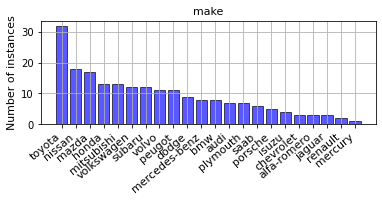

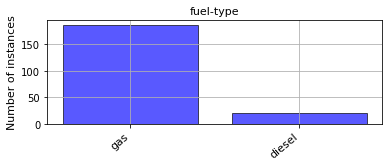

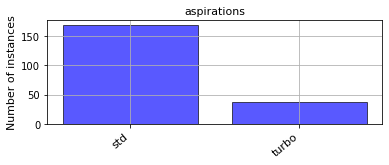

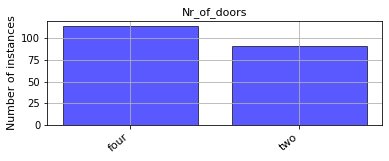

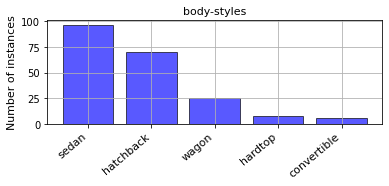

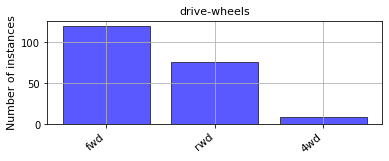

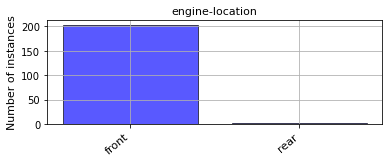

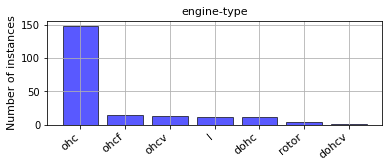

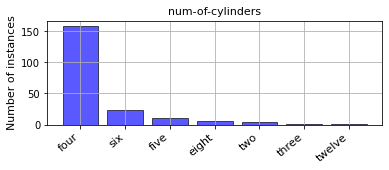

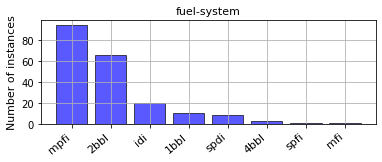

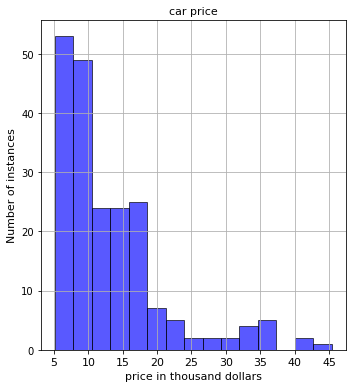

In [51]:
my_figsize = (6,3)

nominals = [2, 3, 4, 5, 6, 7, 8, 14, 15, 17]
counter =0
for x in nominals:
    counter+=1
    name = headers[x]
    fig = plt.figure(figsize=my_figsize)
    my_counts = auto_data[name].value_counts()
    plt.bar(x=my_counts.index, height=my_counts.values, color='blue', edgecolor='k', alpha=0.65)
    plt.title(name,fontsize=11)
    plt.ylabel("Number of instances",fontsize=11)
    plt.xticks(rotation=40,fontsize=11, ha="right")
    plt.grid()
    fig.subplots_adjust(bottom=0.4) 
    plt.savefig("car_nom{0}.pdf".format(counter))
    



fig = plt.figure(figsize=(5,5.5))
plt.hist(auto_data['price']/1e3,bins=15, color='blue', edgecolor='k', alpha=0.65)
plt.title("car price",fontsize=11)
plt.ylabel("Number of instances",fontsize=11)
plt.xlabel("price in thousand dollars",fontsize=11)
plt.xticks(rotation=0,fontsize=11)
plt.tight_layout()
plt.grid()
plt.savefig("car_price.pdf")

In [34]:
auto_data_orig = pd.read_csv(csv_path,  header=None, names=headers,delimiter=",")


# numeric attributes
auto_data_orig = auto_data_orig.replace('?',np.NAN) 
numeric_types_dict ={}
[numeric_types_dict.update({headers[x]: "float"})for x in [1,18,19,20,21,22,25]]
auto_data_orig = auto_data_orig.astype(numeric_types_dict)
pd.options.display.float_format = "{:.2f}".format
descr_data = auto_data_orig.describe().T
descr_data = descr_data.astype({"count":"int"})
attr_type = ["ordinal","ratio","ratio","ratio","ratio","ratio","ratio","ratio",
             "ratio","ratio","ratio","ratio","ratio","ratio","ratio","ratio"]
descr_data["attr_type"] = attr_type
continuous = ["False","True","True","True","True","True","True","True",
             "True","True","True","True","True","True","True","True"]
descr_data["continuous"] = continuous
descr_data = descr_data[["count", "min", "max", "continuous","mean","std", "attr_type"]]
descr_data
print(descr_data.to_latex())


\begin{tabular}{lrrrlrrl}
\toprule
{} &  count &     min &      max & continuous &     mean &     std & attr\_type \\
\midrule
symboling         &    205 &   -2.00 &     3.00 &      False &     0.83 &    1.25 &   ordinal \\
normalized\_losses &    164 &   65.00 &   256.00 &       True &   122.00 &   35.44 &     ratio \\
wheel-base        &    205 &   86.60 &   120.90 &       True &    98.76 &    6.02 &     ratio \\
length            &    205 &  141.10 &   208.10 &       True &   174.05 &   12.34 &     ratio \\
width             &    205 &   60.30 &    72.30 &       True &    65.91 &    2.15 &     ratio \\
height            &    205 &   47.80 &    59.80 &       True &    53.72 &    2.44 &     ratio \\
curb-weight       &    205 & 1488.00 &  4066.00 &       True &  2555.57 &  520.68 &     ratio \\
engine-size       &    205 &   61.00 &   326.00 &       True &   126.91 &   41.64 &     ratio \\
bore              &    201 &    2.54 &     3.94 &       True &     3.33 &    0.27 &     ratio \\

In [35]:
auto_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  205 non-null    int64  
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspirations        205 non-null    object 
 5   Nr_of_doors        205 non-null    object 
 6   body-styles        205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [36]:
pd.options.display.float_format = "{:.2f}".format
print(auto_data.describe().to_latex())

\begin{tabular}{lrrrrrrrrrrrrrrrr}
\toprule
{} &  symboling &  normalized\_losses &  wheel-base &  length &  width &  height &  curb-weight &  engine-size &   bore &  stroke &  compression-ratio &  horsepower &  peak-rpm &  city-mpg &  highway-mpg &    price \\
\midrule
count &     205.00 &             205.00 &      205.00 &  205.00 & 205.00 &  205.00 &       205.00 &       205.00 & 205.00 &  205.00 &             205.00 &      205.00 &    205.00 &    205.00 &       205.00 &   205.00 \\
mean  &       0.83 &             122.00 &       98.76 &  174.05 &  65.91 &   53.72 &      2555.57 &       126.91 &   3.33 &    3.26 &              10.14 &      104.25 &   5125.37 &     25.22 &        30.75 & 13207.13 \\
std   &       1.25 &              31.68 &        6.02 &   12.34 &   2.15 &    2.44 &       520.68 &        41.64 &   0.27 &    0.31 &               3.97 &       39.52 &    476.98 &      6.54 &         6.89 &  7868.77 \\
min   &      -2.00 &              65.00 &       86.60 &  141.10 &  60

In [42]:
np.sum(np.array(auto_data['price'])<20000)/205

0.8780487804878049